<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JulioOsvaldoHernandezBucio/blob/main/Semana8_DataAnalysisWithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Julio Osvaldo Hernandez Bucio. A01794366. Dra. María de la Paz Rico Fernández. Ciencia y Analitica de datos. 02/11/22

# **Model Evaluation and Refinement**

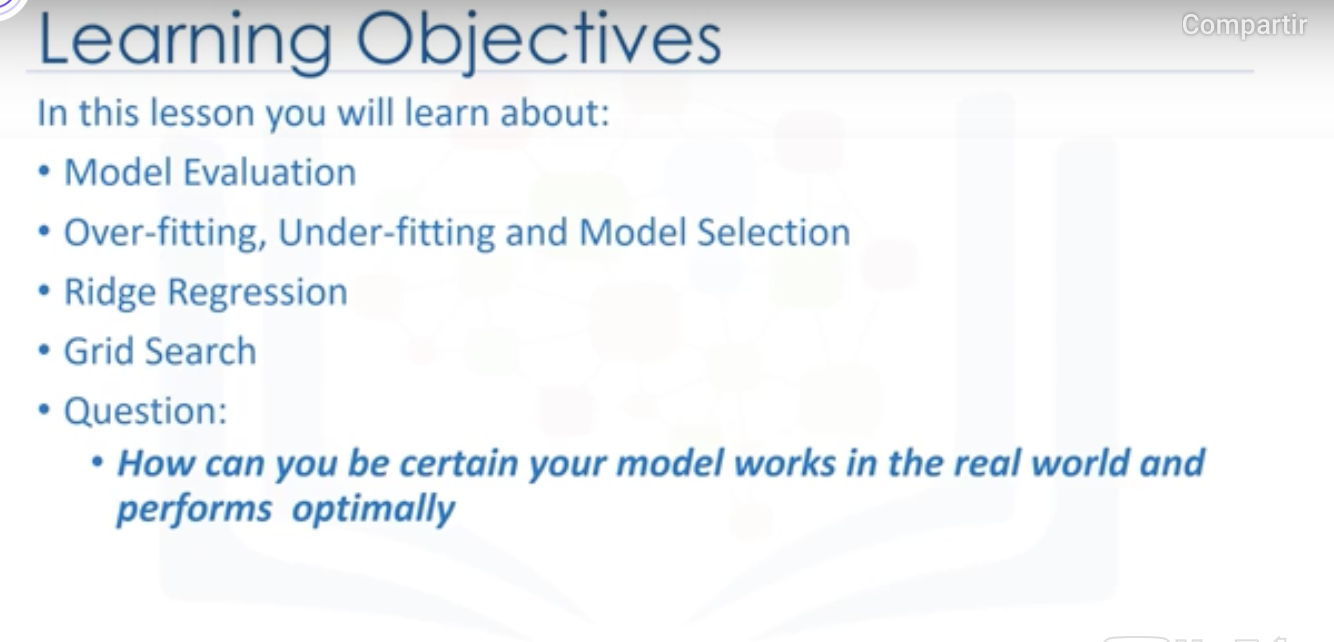

Model Evaluation tells us how our model preforms in the real world.

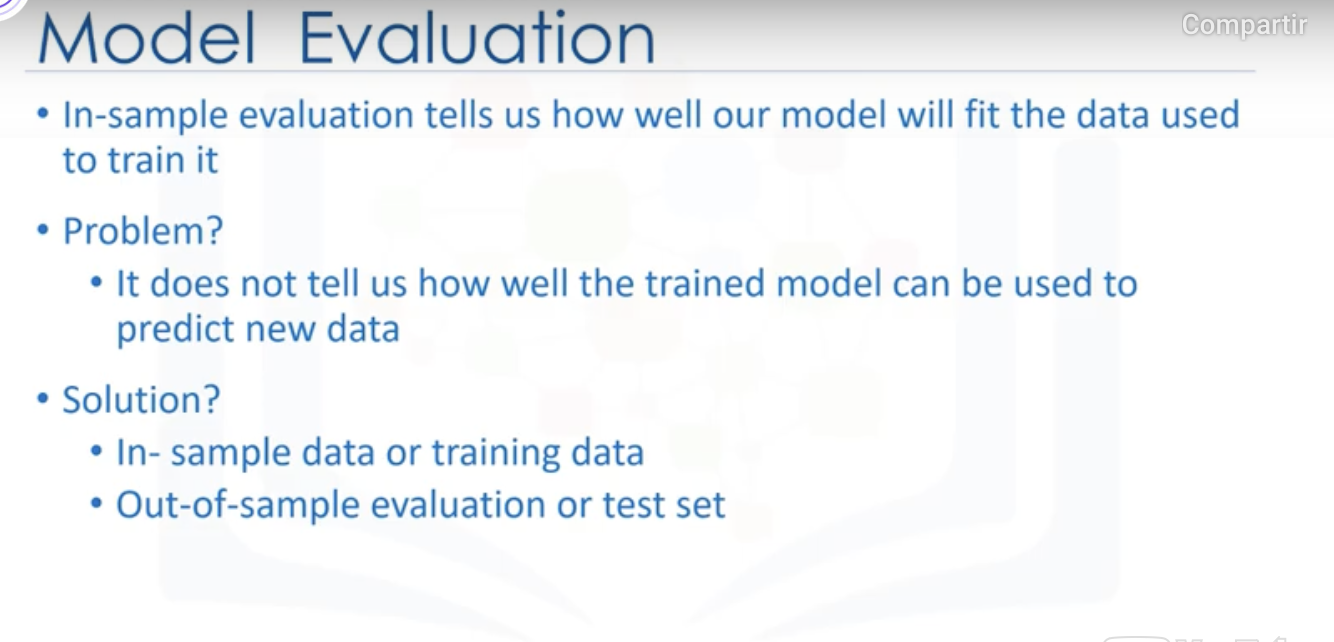

This data is then used to approximate how the model performs in the real world.

Separating data into training and testing sets is an important part of model evaluation.

We use the test data to get an idea how our model will perform in the real world.

When we split a data set, usually the larger portion of data is used for training and a smaller part is used for testing.

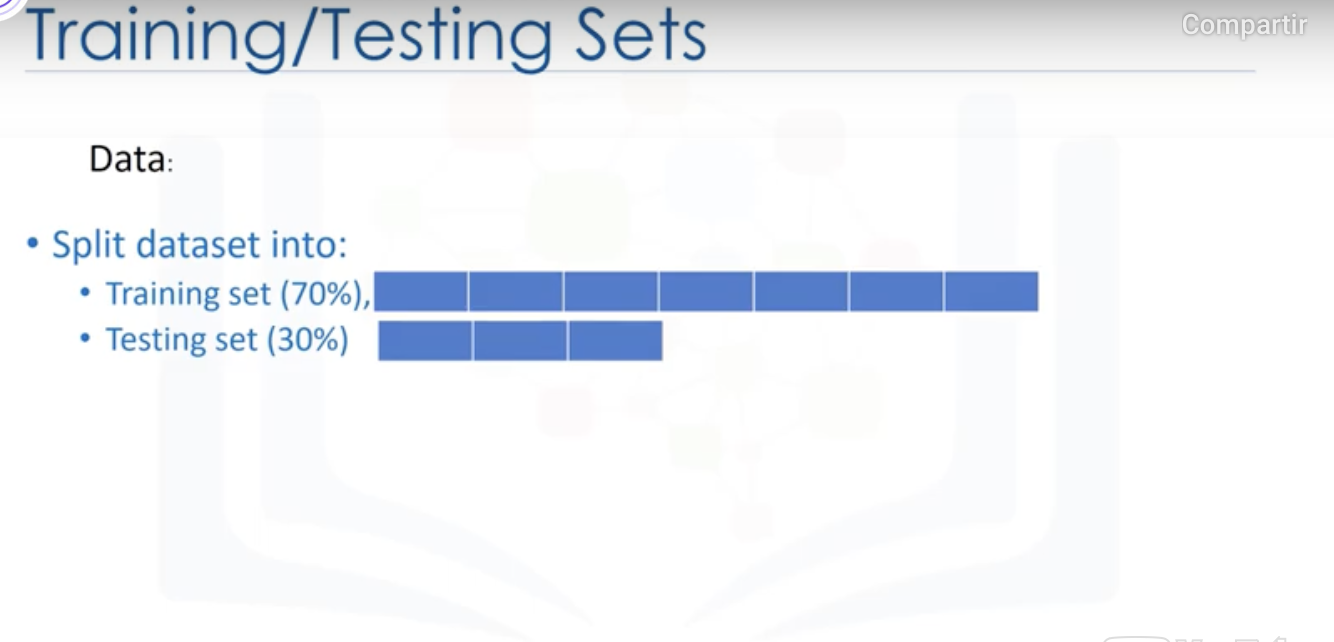

We use a training set to build a model and discover predictive relationships.

We then use a testing set to evaluate model performance.

When we have completed testing our model, we should use all the data to train the model.

A popular function in the sci-kit learn package for splitting datasets is the "train test split" function.

This function randomly splits a dataset into training and testing subsets

In [ ]:
from sklearn.model_selection import train_test_split

The input parameters y_data is the target variable (in the car appraisal example, it would be the price), and "x_data", the list of predictor variables. 

In this case, the "test size" percentage of the data for the testing set. Here it is 30%. The random state is a random seed for random dataset splitting.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

The output is an array: "x_train" and "y_train", the subsets for training; "x_test" and "y_test", the subsets for testing.

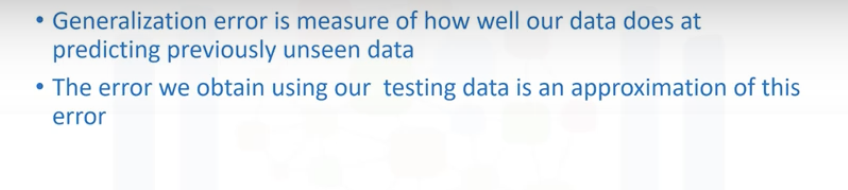

This figure shows the distribution of the actual values in red compared to the predicted values from a linear regression in blue.

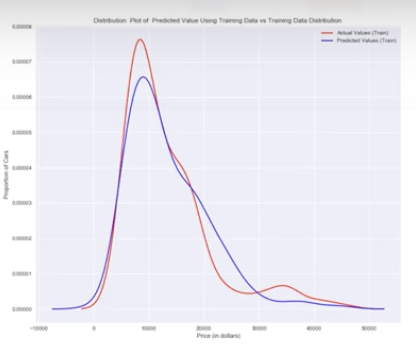

We see the distributions are somewhat similar.

If we generate the same plot using the test data, we see the distributions are relatively different.

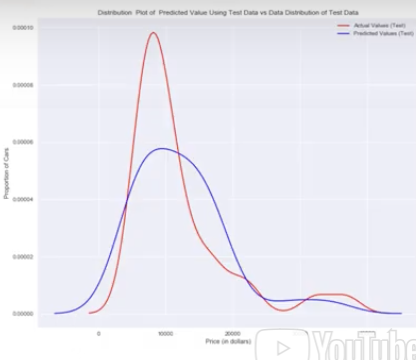

The difference is due to a generalization error and represents what we see in the real world.

Using a lot of data for training gives us an accurate means of determining how our model will perform in the real world, but the precision of the performance will be low.

Let's clarify this with an example.

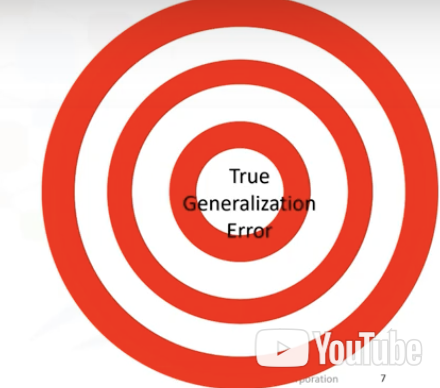

The center of this bullseye represents the correct generalization error;

Let's say we take a random sample of the data using 90% of the data for training and 10% for testing.

Repeating the experiment again with a different combination of training and testing samples, the results are relatively close to the Generalization error, but distinct from each other.

Repeating the process, we get good approximation of the generalization
error, but the precision is poor i.e., all the results are extremely different from one another.

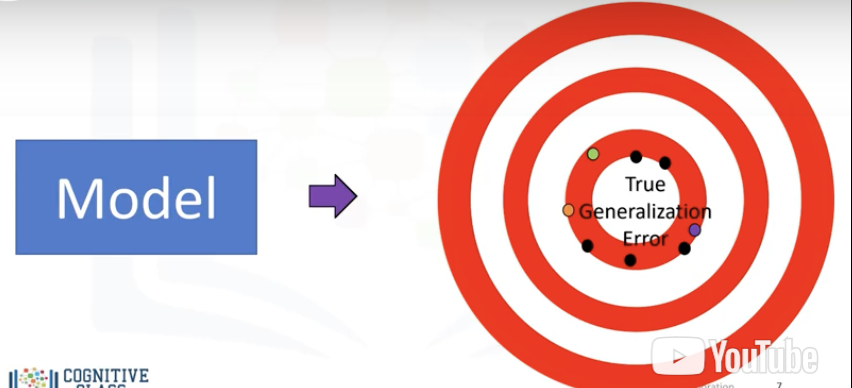

If we use fewer data points to train the model and more to test the model, the accuracy of the generalization performance will be less, but the model will have good precision.

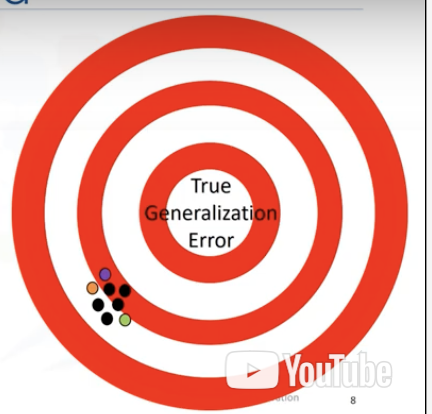

The figure above demonstrates this; all our error estimates are relatively close together, but they are further away from the true generalization performance.

To overcome this problem, we use cross validation.

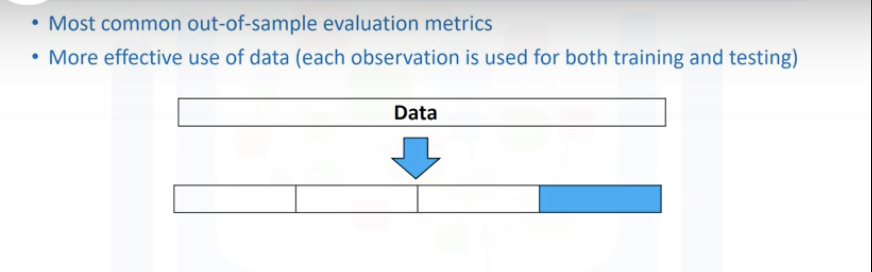

In this method, the dataset is split into k-equal groups; each group is referred to as a fold.

For example 4 folds.


Some of the folds can be used as a training set, which we use to train the model, and the remaining parts are used as a test set, which we use to test the model.

For example, we can use three folds for training; then use one fold for testing.

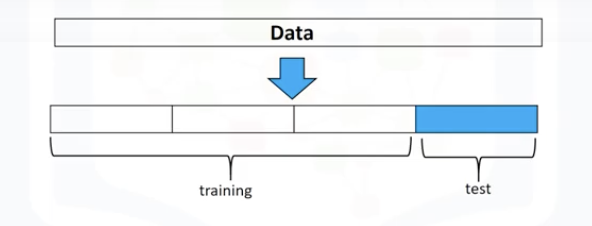

This is repeated until each partition is used for both training and testing.

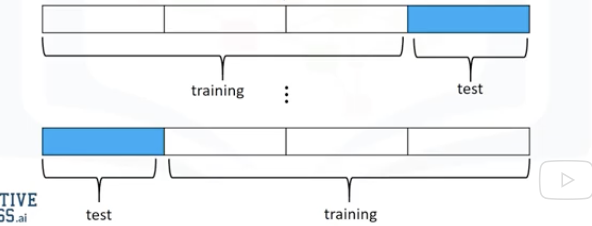

The Simplest way to apply cross validation is to call the cross_val_score() function, which performs multiple 'out-of-sample' evaluations.

This method is imported from sklearn's model selection package.

In [ ]:
from sklearn.model_selection import cross_val_score

We then use the function cross_val_score(). The first input parameter is the type of model we are using to do the cross validation.

The other parameters are x_data, the predictor variable data, and y_data, the target variable data.

We can manage the number of partitions with the cv parameter.
Here, cv = 3, which means the data set is split into 3 equal partitions.

In [ ]:
scores = cross_val_score(lr, x_data, y_data, cv = 3)

The function returns an array of scores, one for each partition that was chosen as the testing set.

We can average the result together to estimate out-of-sample R-squared using the mean function in numpy.

In [ ]:
np.mean(scores)

What if we want a little more information: what if we want to know the actual predicted values supplied by our model before the R squared values are calculated?

To do this, we use the cross_val_predict() function.

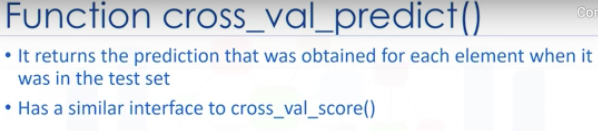

The input parameters are exactly the same as the cross_val_score() function, but the output is a prediction.

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
yhat = cross_val_predict(lr2e, x_data, y_data, cv=3)

# Overfitting, Underfitting and Model Selection

In this section, we will discuss how to pick the best polynomial order and problems that arise with selecting the wrong order polynomial.

If we increase the order of the polynomial, the model fits better, but the model is still not flexible enough and exhibits under-fitting.

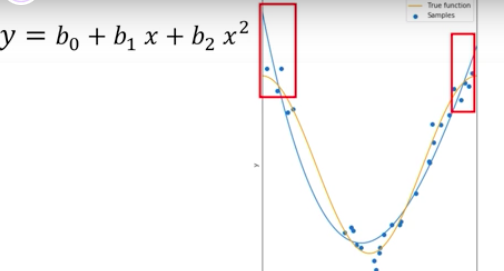

This is an example of the 8th order polynomial used to fit the data; we see the model does well at fitting the data and estimating the function, even at the inflection points.

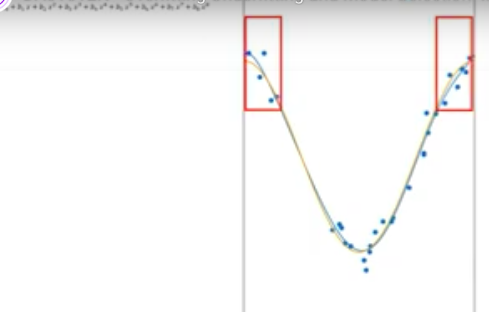

Increasing it to a 16th order polynomial, the model does extremely well at tracking the training points, but performs poorly at estimating the function.

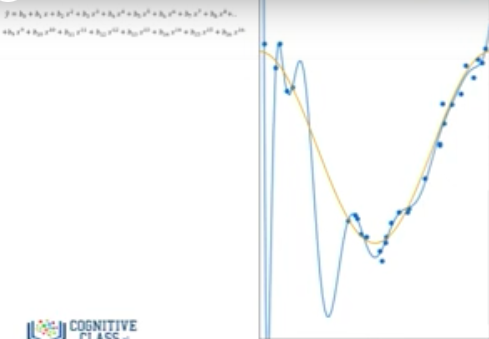

This is especially apparent where there is little training data; the estimated function oscillates not tracking the function.

This is called over-fitting, where the model is too flexible and fits the noise rather than the function.

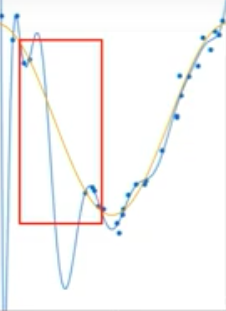

For example, in this plot, the data is generated from a sine wave; the polynomial function  does not do a good job at fitting the sine wave.

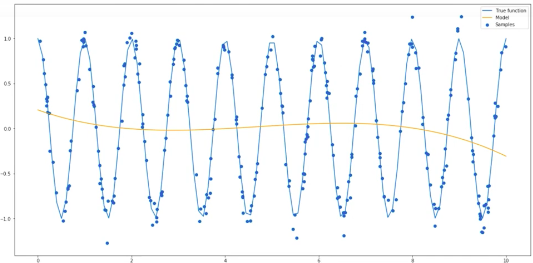

For real data, the model may be too difficult to fit, or we may not have the correct type of data to estimate the function.

Let's try different order polynomials on the real data using horse power; the red points represent the training data; the green points represent the test data.

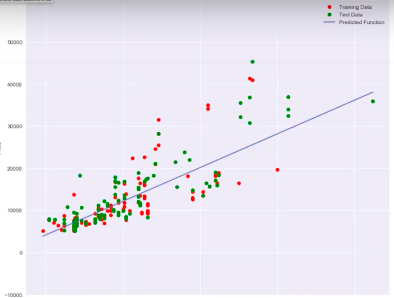

A linear function does fit the data better.

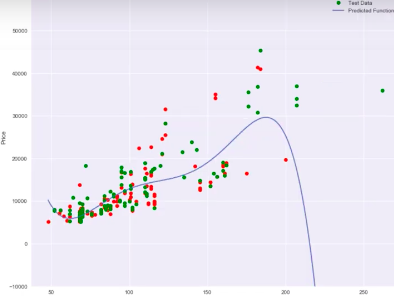

Here we see a 4th order polynomial.

At around 200 horse power, the predicted price suddenly decreases; this seems erroneous.

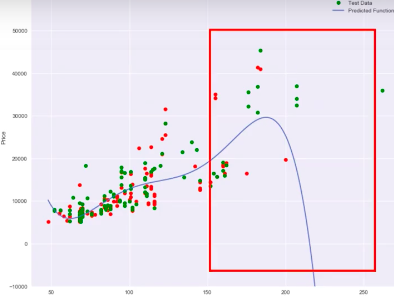

Let's use R-squared to see if our assumption is correct.

The following is a plot of the R-squared value, the horizontal axis represents the order of polynomial models.

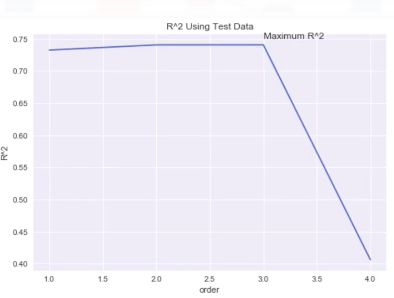

Here we see the R-squared is optimal when the order of the polynomial is three.
The R-squared drastically decreases when the order is increased to 4, validating our initial
assumption.

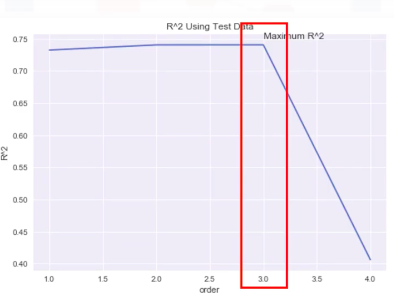

We can calculate different R-squared values as follows:

In [ ]:
from sklearn import PolynomialFeatures

Rsqu_test = []
order=[1,2,3,4]

for n in order:

  pr = PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  x_test_pr = pr.fit_transform(x_test[['horsepower']])

  lr.fit(x_train_pr, y_train)

  Rsqu_test.apped(lr.score(x_test_pr, y_test))

# Ridge Regression

Ridge regression prevents over-fitting.

Consider the following 4th order polynomial in orange.
The blue points are generated from this function.

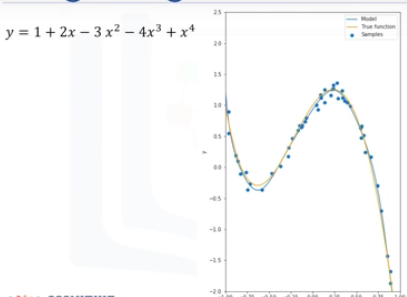

In many cases real data has ouliers. For example, this point shown here does not appear to come from the function in orange. 

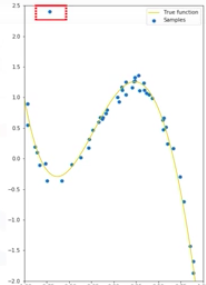

If we use a 10th order polynomial function to fit the data, the estimated function in blue is incorrect and is not a good estimate of the actual function in orange.

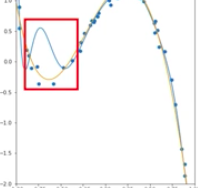

If we examine the expression for the estimated function, we see the estimated polynomial coefficients have a very large magnitude.
This is especially evident for the higher order polynomials.

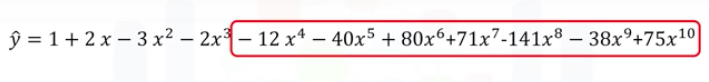

Ridge regression controls the magnitude of these polynomial coefficients by introducing the parameter alpha.

Each row in the following table represents an increasing value of alpha.

This table represents the polynomial coefficients for different values of alpha.
The columns correspond to the different polynomial coefficients and the rows correspond to the different values of alpha.

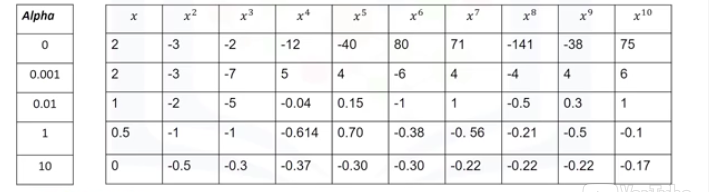

As alpha increases, the parameters get smaller.

When alpha equals 1, we see the first signs of under-fitting.

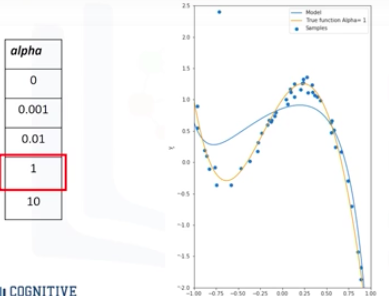

At alpha equals to 10, we see extreme under-fitting; it does not even track the two points.

In order to select alpha we use cross-validation.

To make a prediction using ridge regression, import ridge from sklearn linear models. Create a Ridge object using the constructor.
The parameter alpha is one of the arguments of the constructor.
We train the model using the fit method.
To make a prediction, we use the predict method.

In [ ]:
from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(X,y)

Yhat = RidgeModel.predict(X)

In order to determine the parameter alpha, we use some data for training.

We use a second set called validation data; this is similar to test data, but it is used to select parameters like alpha

We start with a small value of alpha, we train the model, make a prediction using the validation data, then calculate the R squared and store the values.

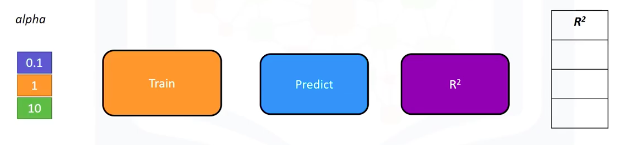

Repeat the value for a larger value of alpha.

We select the value of alpha that maximizes the R squared.

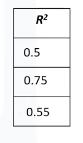

The Overfitting problem is even worse if we have lots of features.

The following plot shows the different values of R squared on the vertical axis.

The horizontal axis represents different values for alpha.

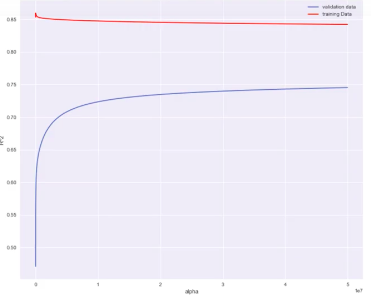

We use several features from our used car data set and a second order polynomial function.

The training data is in red and validation data is in blue.

We see as the value for alpha increases, the value the R squared increases and converges at approximately 0.75.

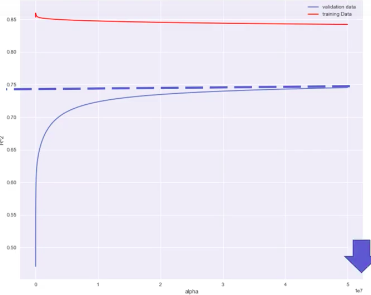

In this case, we select the maximum value of alpha because running the experiment for higher values of alpha have little impact.

Conversely, as alpha increases, the R squared on the test data decreases.

# Grid Search

Grid search allows us to scan through multiple free parameters with few lines of code.

Parameters like the alpha term discussed in the previous video are not part of the fitting or training process.

These values are called hyperparameters.

Scikit-learn has a means of automatically iterating over these hyperparameters using cross-validation.

This method is called Grid search.

Grid search takes the model or objects you would like to train and different values of the hyperparameters.

It then calculates the mean square error or R squared for various hyperparameter values, allowing you to choose the best values.

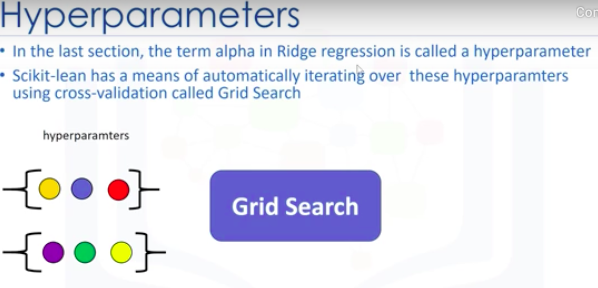

We start off with one value for hyperparameters and train the model.

We use different hyperparameters to train the model.

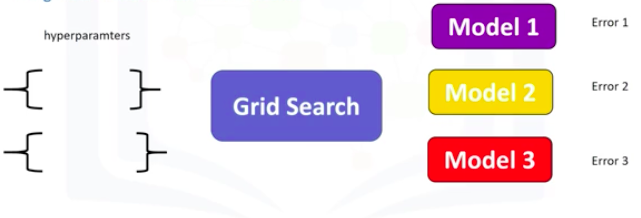

We continue the process until we have exhausted the different free parameter values.

Each model produces an error.

We select the hyperparameter that minimizes the error.

To select the hyperparameter, we split our dataset into three parts, the training set, validation set, and test set.


We train the model for different hyperparameters.

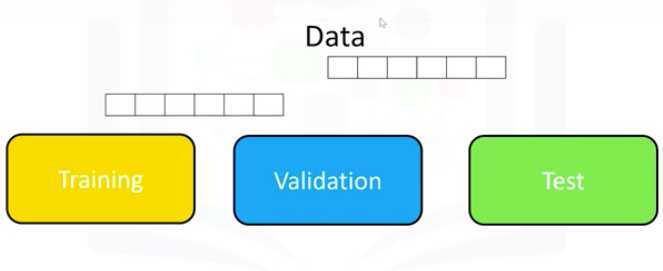

We use the R squared or mean square error for each model.

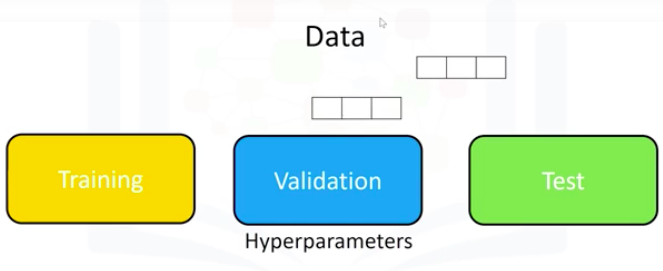

We select the hyperparameter that minimizes the mean squared error or maximizes the R squared on the validation set

We finally test our model performance using the test data.

In this module, we will focus on the hyperparameter alpha and the normalization parameter.

The value of your grid search is a Python list that contains a Python dictionary.

The key is the name of the free parameter. The value of the dictionary is the different values of the free parameter.

In [ ]:
parameters = [{'alpha' : [1,10,100,1000]}]

We also have the object or model: Ridge()

The grid search takes on the scoring method, in this case R squared, the number of folds, the model or object, and the free parameter values.

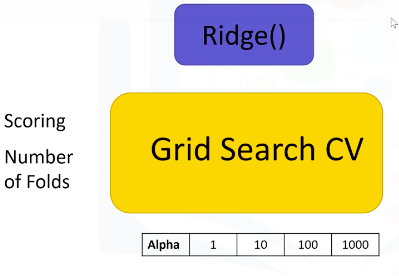

Some of the outputs include the different scores for different free parameter values; in this case the R squared along with the free parameter values that have the best score.

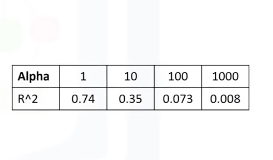

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters1 = [{'alpha' : [0.001, 0.01, 1, 10, 100, 1000, 10000, 100000]}]

RR = Ridge()

#We then create a Grid Search CV object; the inputs are the ridge regression object, the parameter values and the number of folds.
#We will use R squared; this is the default scoring method.

Grid1 = GridSearchCV(RR, parameters1, cv=4)

Grid1 = fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

#We can find the best values for the free parameters using the attribute best estimator.

Grid1.best_estimator_

We can also get information like the mean score on the validation data using the attribute cv result.

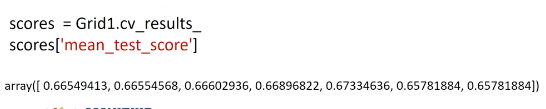

One of the advantages of Grid search is how quickly we can test multiple parameters.

For example, Ridge regression has the option to normalize the data.

In [ ]:
parameters = [{'alpha' : [1,10,100,1000], 'normalize' : [True, False]}]

The Dictionary is a table or grid that contains two different values.

As before, we need the ridge regression object or model.

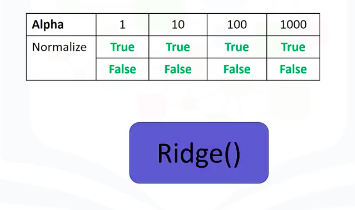

The procedure is similar, except that we have a table or grid of different parameter values.

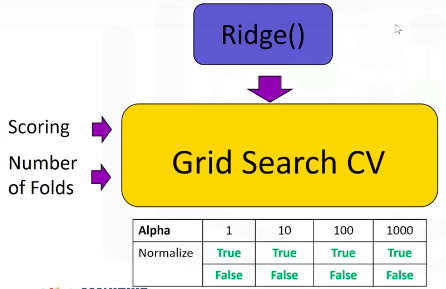

The output is the score for all the different combinations of parameter values.

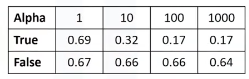

The code is also similar

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters2 = [{'alpha' : [0.001, 0.01, 1, 10, 100], 'normalize' : [True, False] }]

RR = Ridge()

#We then create a Grid Search CV object; the inputs are the ridge regression object, the parameter values and the number of folds.
#We will use R squared; this is the default scoring method.

Grid1 = GridSearchCV(RR, parameters1, cv=4)

Grid1 = fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

#We can find the best values for the free parameters using the attribute best estimator.

Grid1.best_estimator_

#The resulting scores of the different free parameters are stored in this dictionary:

scores = Grid1.cv_results_

In [ ]:
for param, mean_val, mean_test in zip(scores['params'], scores['mean_test_score'], scores['mean_train_score']):
  print(param, "R2 on test data", mean_val, "R2 on train data", mean_test)

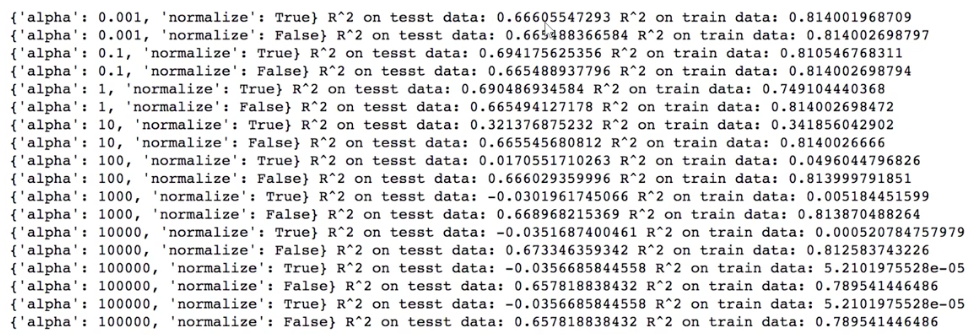

# Labs

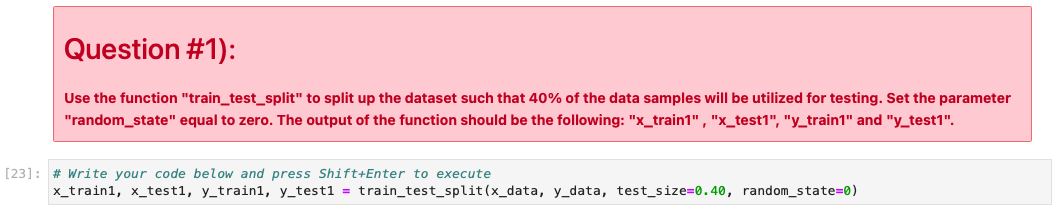

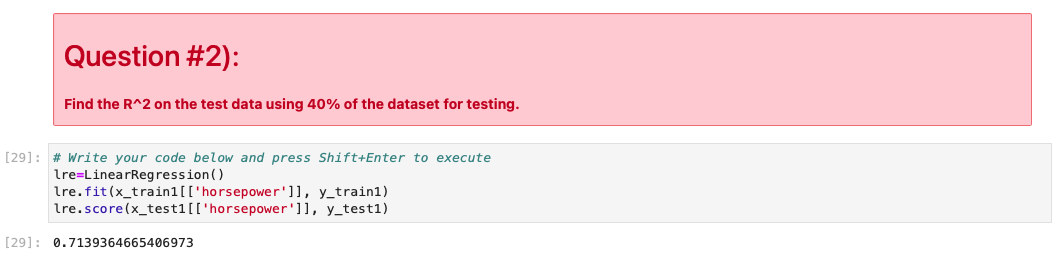

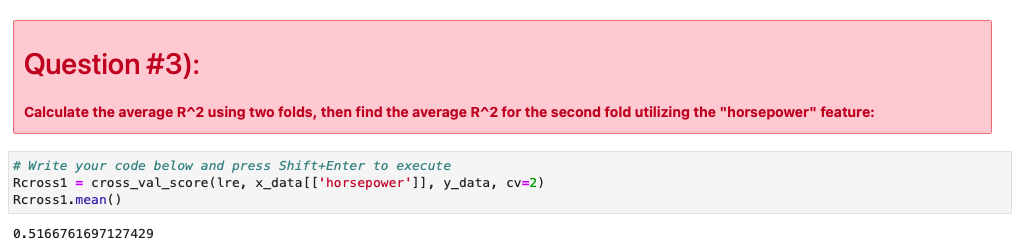

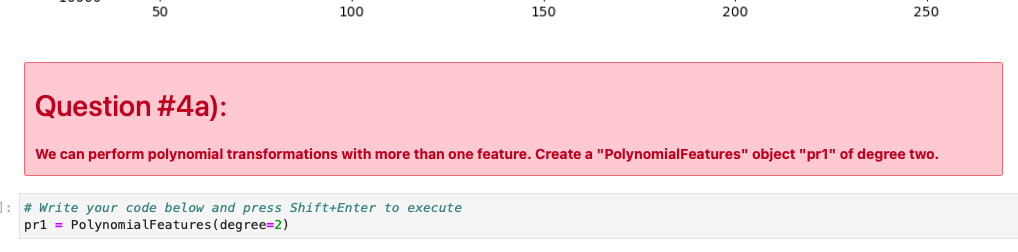

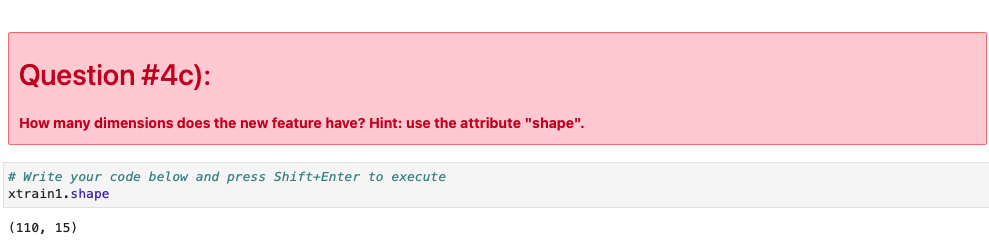

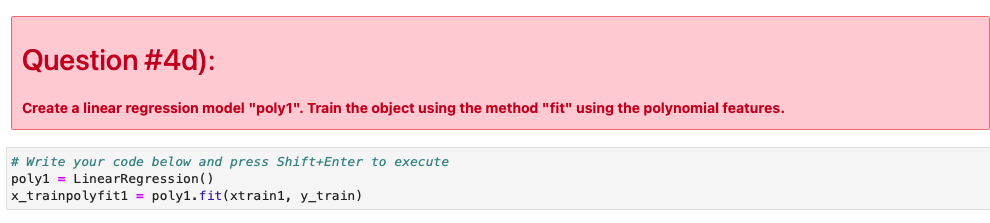

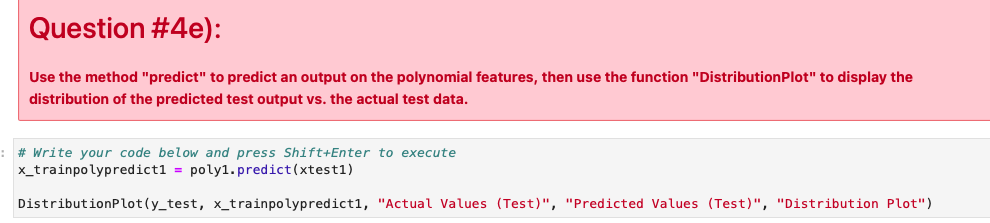

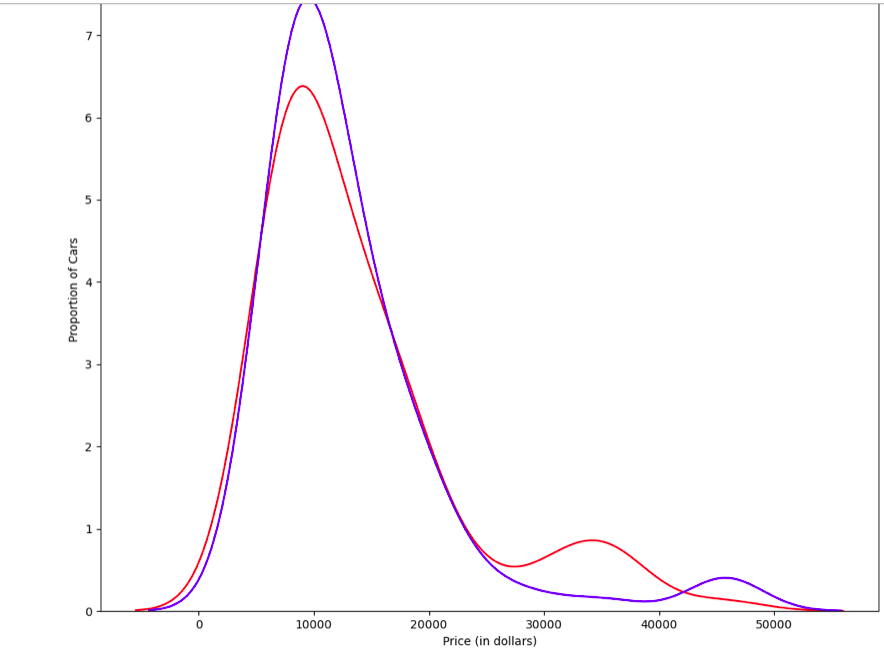

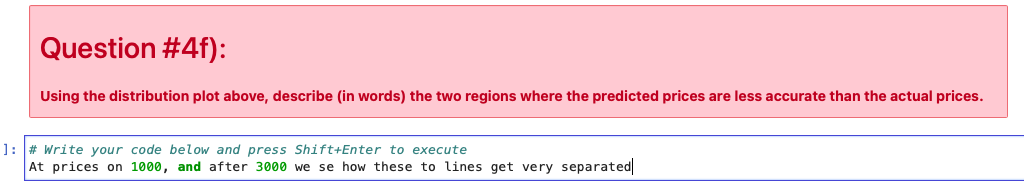

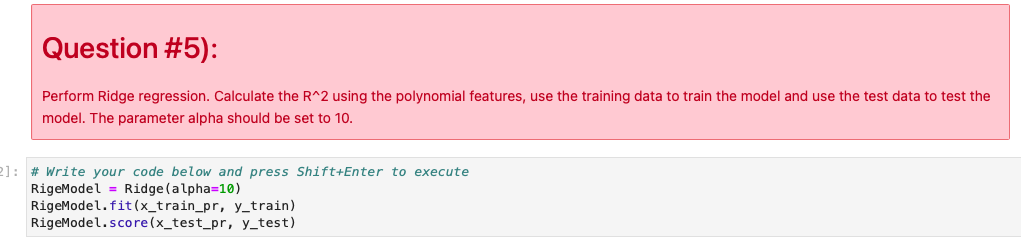

# Graded Questions Reviews

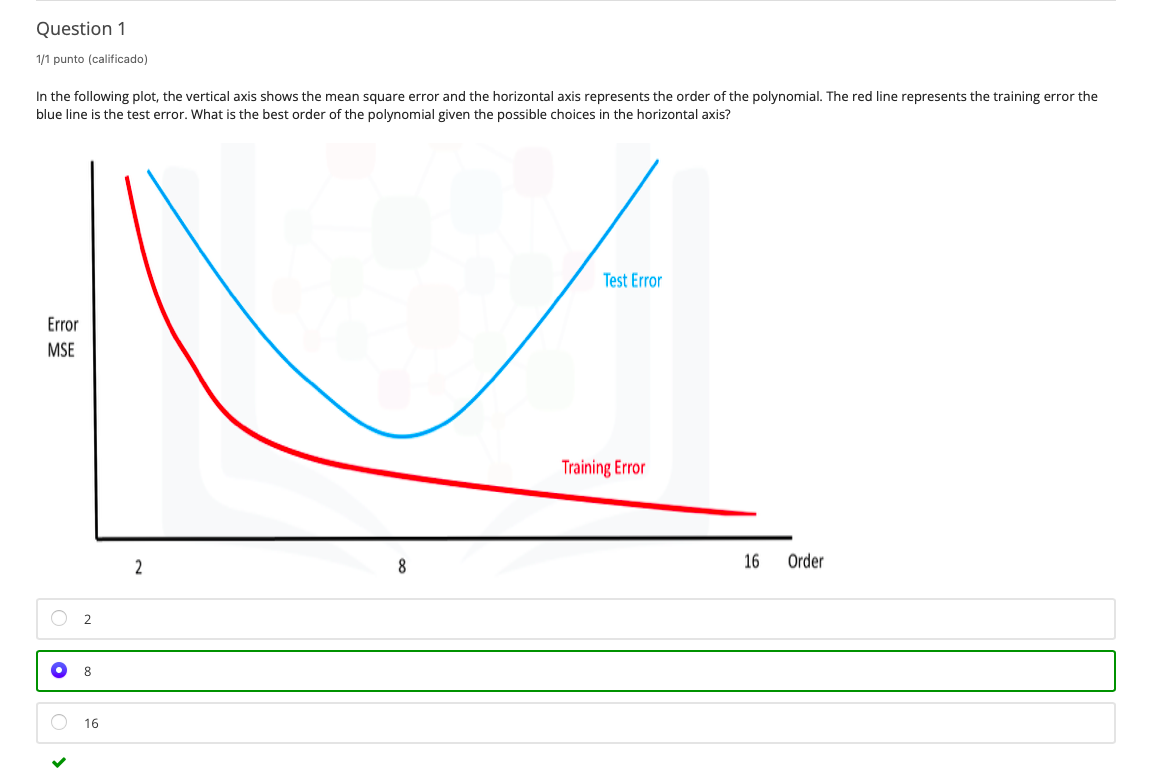

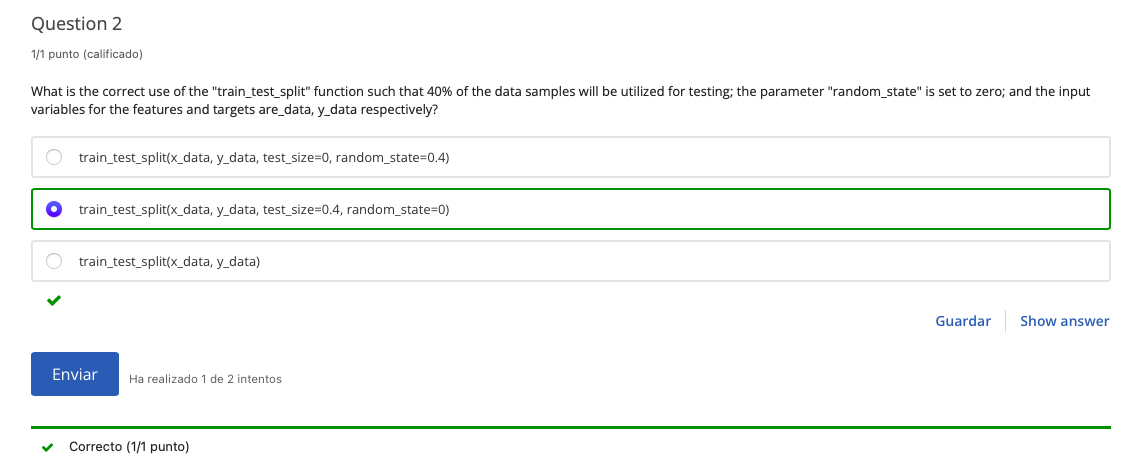

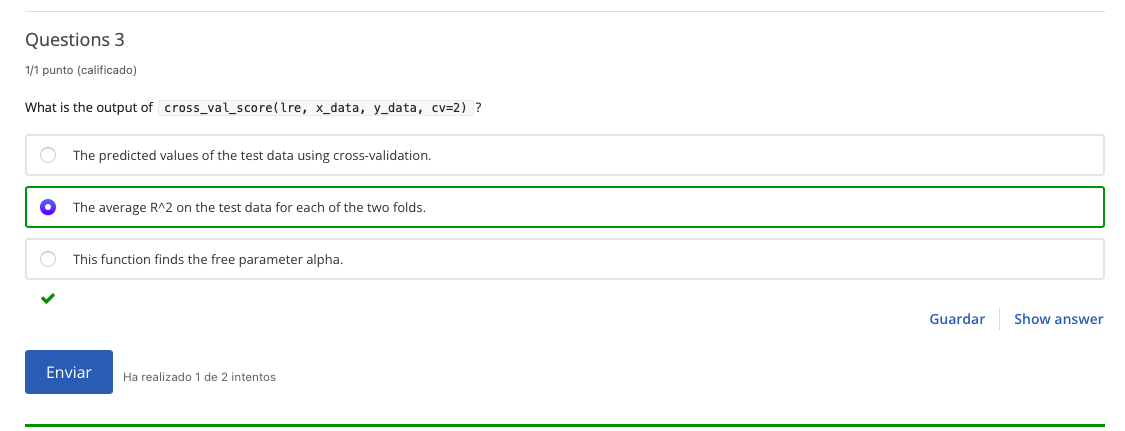

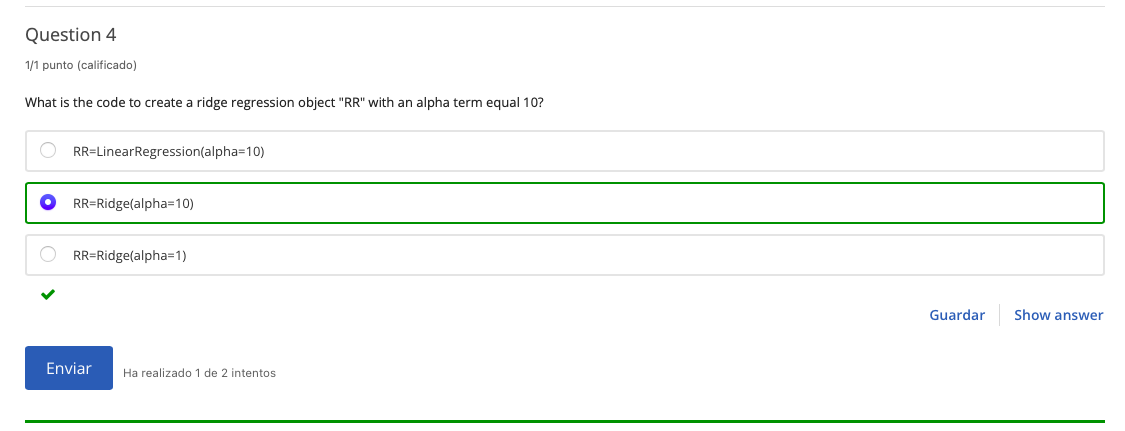

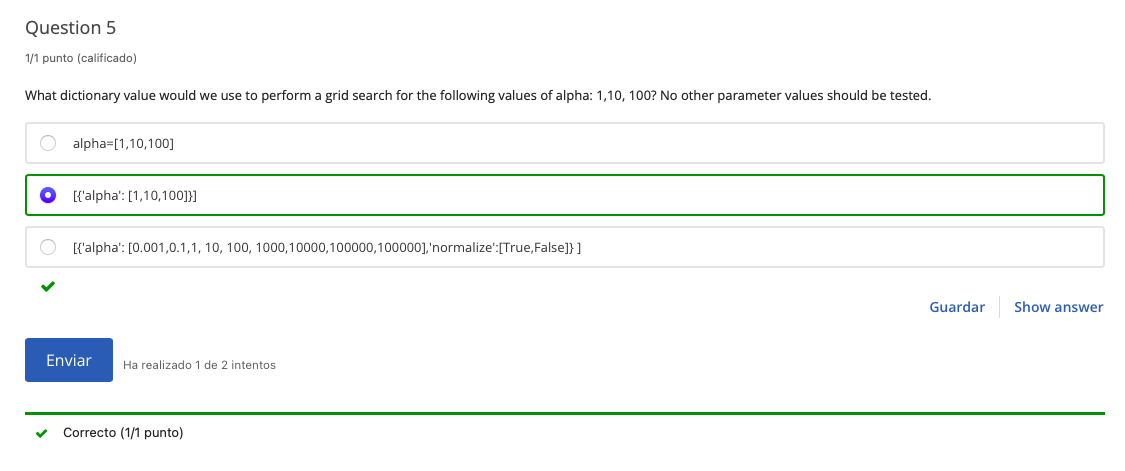